# Prediction of Stock Price Time Series using Transformers (Costa and Machado)

The data used was about brazilian stocks.

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [42]:
tickers = ["BBDC4.SA", "BRAP4.SA", "CMIG4.SA", "GGBR4.SA",
           "GOAU4.SA", "GOLL4.SA", "ITSA4.SA", "ITUB4.SA"]

data_adj_close = yf.download(tickers, start="2008-01-01", end="2008-04-30")["Close"]


[*********************100%***********************]  8 of 8 completed


In [43]:
data_adj_close.head(-5)

Ticker,BBDC4.SA,BRAP4.SA,CMIG4.SA,GGBR4.SA,GOAU4.SA,GOLL4.SA,ITSA4.SA,ITUB4.SA
Date,,,,,,,,
2008-01-02,10.763638,5.069197,1.520238,11.367640,16.216068,40.429779,2.936943,10.039676
2008-01-03,10.544521,4.909453,1.511055,11.367640,16.594839,38.332008,2.897959,9.850509
2008-01-04,10.420607,4.707111,1.478902,11.367640,16.173452,36.396332,2.884963,9.919711
2008-01-07,10.613586,4.663449,1.487632,11.367640,15.742606,37.378471,2.884963,9.919711
2008-01-08,10.776092,4.663449,1.487632,11.367640,15.624239,36.434475,2.910952,10.011984
...,...,...,...,...,...,...,...,...
2008-04-15,10.120653,4.739059,1.462366,11.431442,19.393431,24.124371,2.668006,9.235815
2008-04-16,10.532190,4.956311,1.500032,11.431442,20.096693,24.515320,2.803226,9.697598
2008-04-17,10.897998,4.914779,1.525292,11.431442,19.786777,24.029018,2.868236,10.043946


This data is different, they have used daily averages. Let's try averages also until we find similar values.

In [44]:
tickers = ["BBDC4.SA", "BRAP4.SA", "CMIG4.SA", "GGBR4.SA",
           "GOAU4.SA", "GOLL4.SA", "ITSA4.SA", "ITUB4.SA"]

# Pull all OHLCV data at once (flat MultiIndex, more robust)
data = yf.download(tickers, start="2008-01-01", end="2008-04-30", auto_adjust=False)

# Extract and compute correct averages
average_prices = {}

for ticker in tickers:
    df = data.xs(ticker, level=1, axis=1).copy()  # flatten by ticker

    # If any column is missing, skip this ticker
    if df[["Open", "High", "Low", "Close"]].isnull().all().any():
        print(f"⚠️ Skipping {ticker} due to missing OHLC data.")
        continue

    df["avg_ohlc4"] = (df["Open"] + df["High"] + df["Low"] + df["Close"]) / 4
    df["avg_hl2"] = (df["High"] + df["Low"]) / 2
    df["avg_hlc3"] = (df["High"] + df["Low"] + df["Close"]) / 3
    df["median_price"] = (df["Open"] + df["Close"]) / 2

    average_prices[ticker] = df[["avg_ohlc4", "avg_hl2", "avg_hlc3", "median_price"]]


[                       0%                       ]

[*********************100%***********************]  8 of 8 completed


In [45]:
average_prices

{'BBDC4.SA': Price       avg_ohlc4    avg_hl2   avg_hlc3  median_price
 Date                                                     
 2008-01-02  22.797762  22.812310  22.551820     22.783214
 2008-01-03  21.874960  21.904058  21.795289     21.845862
 2008-01-04  21.552811  21.552811  21.476603     21.552811
 2008-01-07  21.639064  21.704533  21.709382     21.573595
 2008-01-08  22.155541  22.228285  22.169397     22.082798
 ...               ...        ...        ...           ...
 2008-04-23  22.290637  22.306225  22.249069     22.275048
 2008-04-24  22.365458  22.399752  22.442359     22.331165
 2008-04-25  22.823741  22.792565  22.885053     22.854917
 2008-04-28  23.091852  23.107440  23.015991     23.076264
 2008-04-29  22.407545  22.352987  22.290636     22.462103
 
 [80 rows x 4 columns],
 'BRAP4.SA': Price       avg_ohlc4    avg_hl2   avg_hlc3  median_price
 Date                                                     
 2008-01-02  21.943068  21.943068  21.943068     21.943068
 2008-

They are similar but not exactly identical, let's plot and compare.

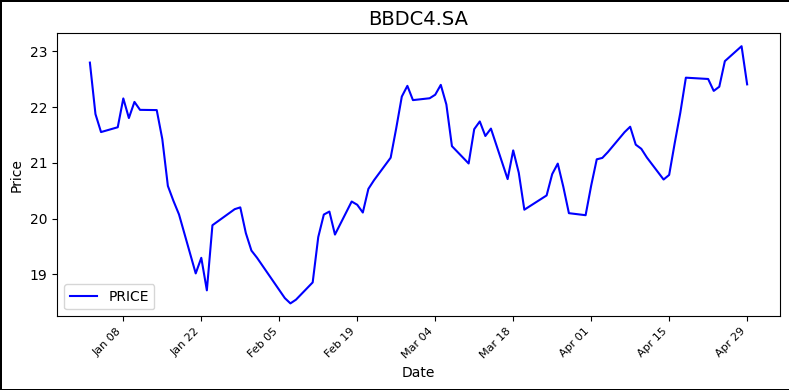

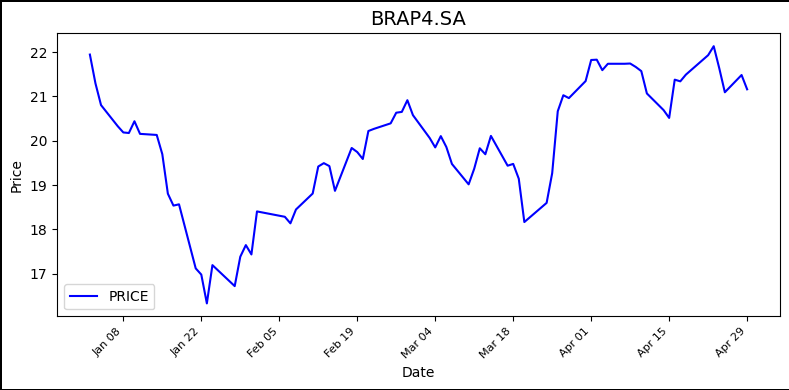

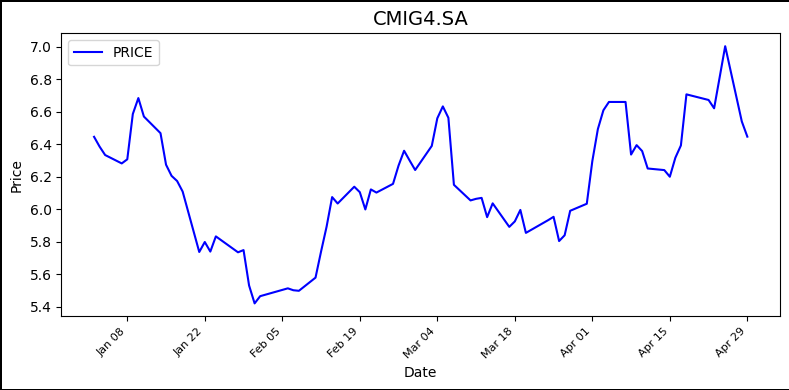

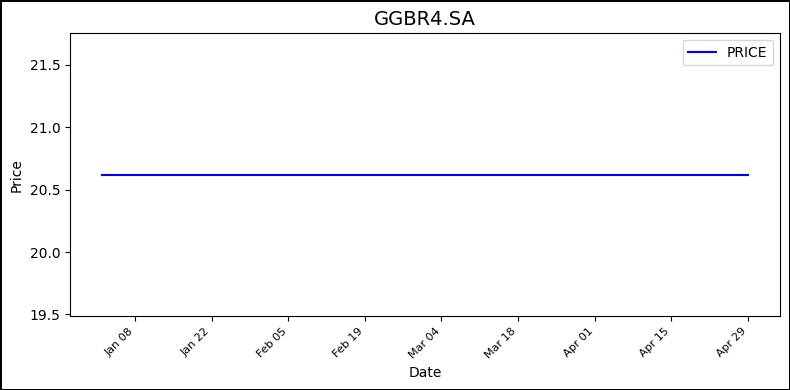

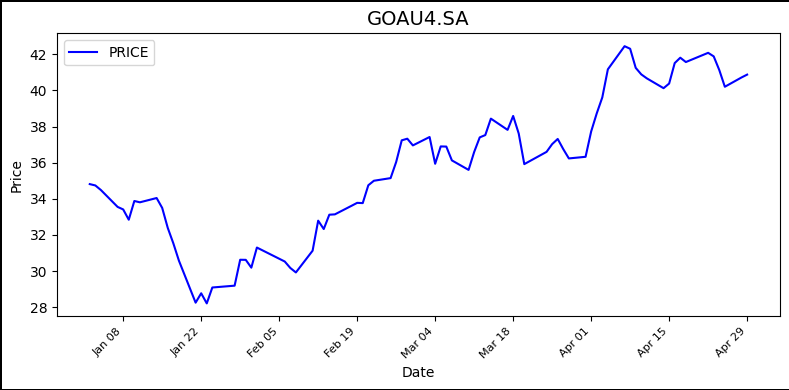

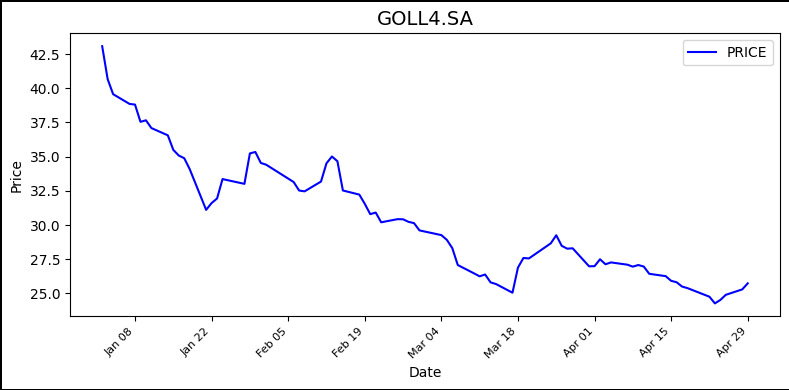

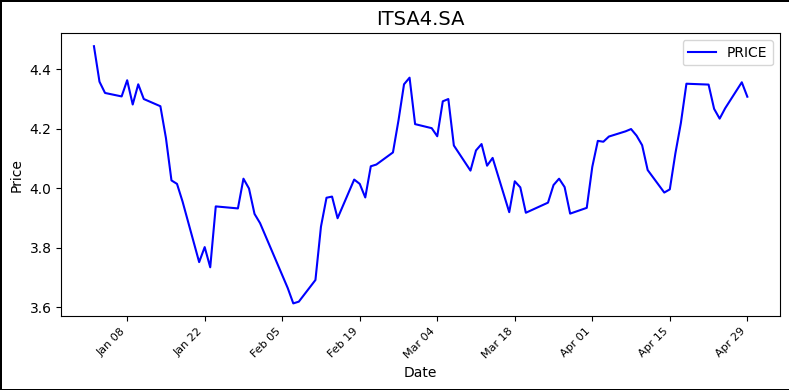

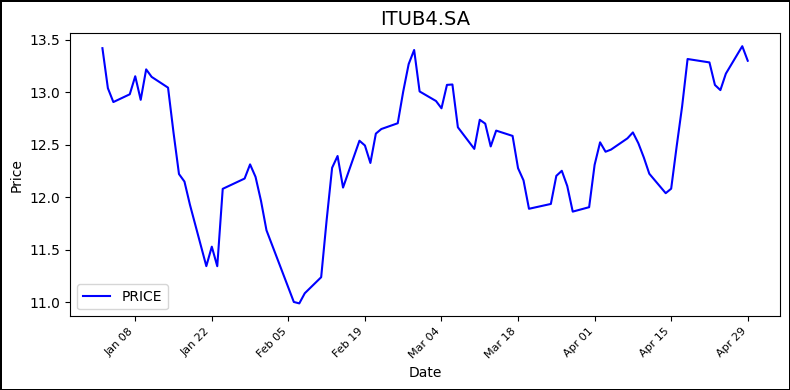

In [46]:
# Loop through each stock and plot avg_ohlc4
for ticker, df in average_prices.items():
    df = df.dropna()

    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot avg_ohlc4 in blue
    ax.plot(df.index, df["avg_ohlc4"], color='blue', label="PRICE")

    # Title, labels, and legend
    ax.set_title(ticker, fontsize=14, fontweight='medium')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()

    # Format x-axis dates
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # show every 2nd week
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))    # format as 'Jan 15', etc.
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=8)

    # Styling: white background, black border, no grid
    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    fig.patch.set_edgecolor("black")
    fig.patch.set_linewidth(2)
    ax.grid(False)

    # Tight layout and show
    plt.tight_layout()
    plt.show()


There is a clear problem with GGBR4

In [47]:
print(data["Open"]["GGBR4.SA"].unique())
print(data["High"]["GGBR4.SA"].unique())
print(data["Low"]["GGBR4.SA"].unique())
print(data["Close"]["GGBR4.SA"].head())


[20.61904716]
[20.61904716]
[20.61904716]
Date
2008-01-02    20.619047
2008-01-03    20.619047
2008-01-04    20.619047
2008-01-07    20.619047
2008-01-08    20.619047
Name: GGBR4.SA, dtype: float64


Re-try with Adj-Close prices

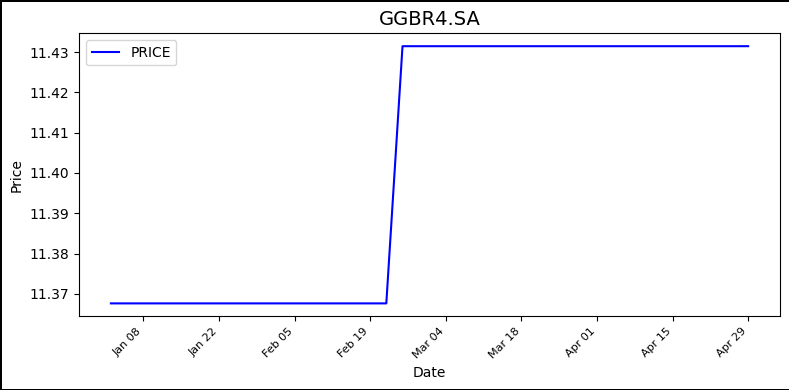

In [48]:
# Extract the Close price series
ggbr4 = data_adj_close["GGBR4.SA"].dropna()

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(ggbr4.index, ggbr4.values, color='blue', label="PRICE")

# Titles and labels
ax.set_title("GGBR4.SA", fontsize=14, fontweight='medium')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=8)

# White background, black border, no grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_edgecolor("black")
fig.patch.set_linewidth(2)
ax.grid(False)

plt.tight_layout()
plt.show()


This could be excluded from the analysis.